Agenda in this dataset:
  * import libraries
  * EDA
  * Data Processing
  * Visualization
  * Exploration
  * Dimensionality Reduction using PCA
  * Clustering using KMeans and Agglomerative

  

In [ ]:
import numpy as np
import plotly as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# getting the shape of the dataset
df.shape

(2240, 29)

In [ ]:
# getting the last entities of the dataset
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
# getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# getting the statistical data of the dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# getting the datatype in the dataset
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

**Data Preparation**

In [ ]:
# finding the missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Here it can be clearly seen that there is some small proportion of data missing from the a column. So we will drop these missing values without affecting the whole dataset

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

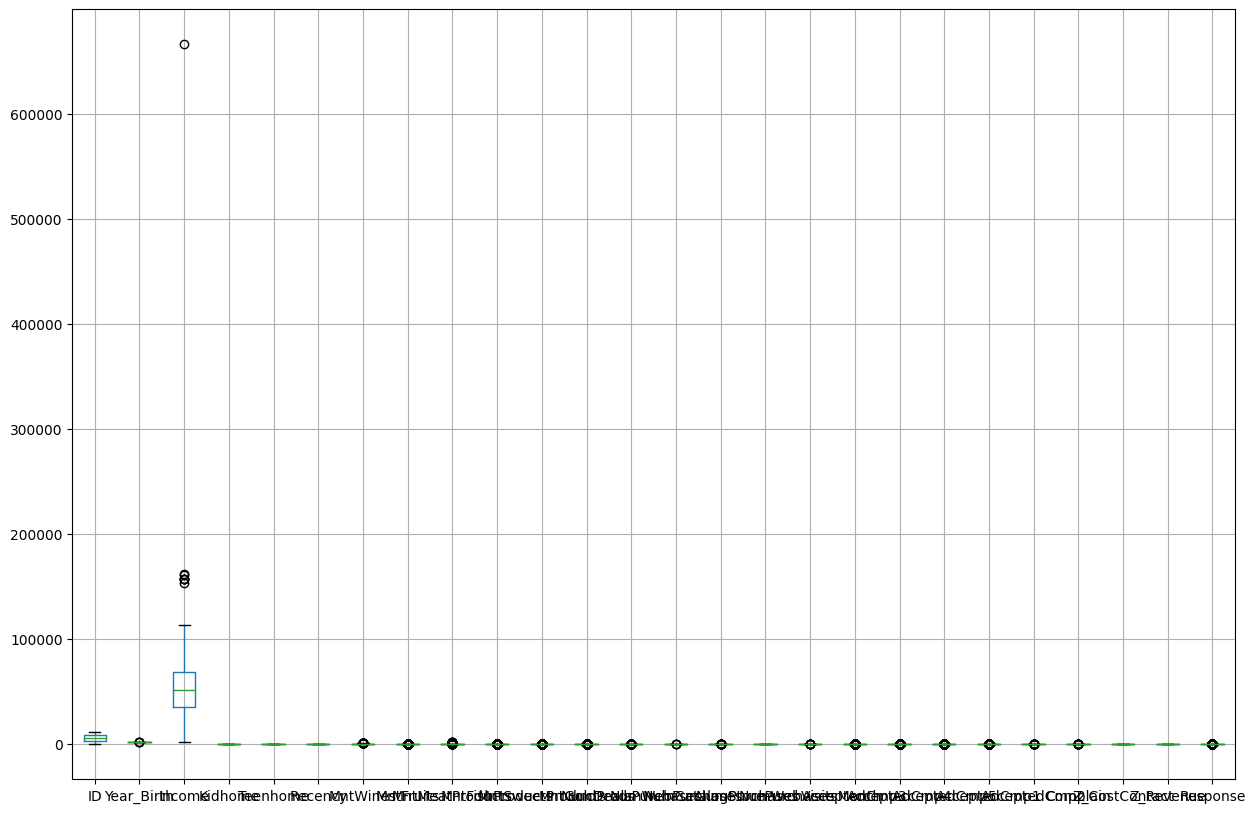

In [ ]:
# now we will see if there are outliers in the data
fig, ax = plt.subplots(figsize=(15, 10))
# plotting the box plot for all columns
df.boxplot(ax = ax)
plt.show()

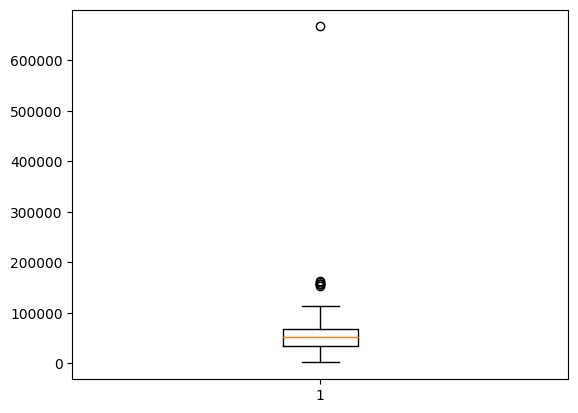

In [ ]:
# plotting the distribution to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [ ]:
# calculating the outliers for Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

IQR = Q3-Q1

# identifying the outliers
outliers = df[(df['Income']<(Q1 - 1.5*IQR)) | (df['Income']>(Q3+1.5*IQR))]
print(f"Outliers: {len(outliers)}")

Outliers: 8


In [ ]:
# removing the outliers
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]


In [ ]:
# printing the updated shape of the dataframe
df.shape

(2208, 29)

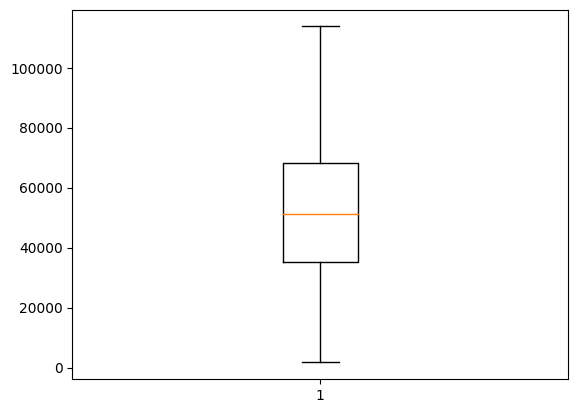

In [ ]:
# plotting the distribution of boxplot
plt.boxplot(df['Income'])
plt.show()

In [ ]:
# Feature engineering
# finding the unique values in the dataset where we have the category of input
print("Unique values in the education col: ", df['Education'].unique())
print("Unique values in the Martial col: ", df['Marital_Status'].unique())

Unique values in the education col:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in the Martial col:  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
# changing the education status
def education_level(education):
  if education in ['Graduation', 'PhD', 'Master']:
    return 'High'
  elif education in ['Basic']:
    return 'Medium'
  else:
    return 'Low'

df['Education_Leve'] = df["Education"].apply(education_level)

In [ ]:
# changing the marital status
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df['Living_Status'] = df['Marital_Status'].apply(living_status)

In [ ]:
# creating the age of the users
df['Age'] = 2023 - df['Year_Birth']

In [ ]:
# creating total number of campaigns accepted
df['Total_Campaign_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_Leve,Living_Status,Age,Total_Campaign_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,High,Living with Others,66,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,High,Living with Others,69,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,High,Living with Others,58,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,High,Living with Others,39,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,High,Living with Others,42,0


In [ ]:
# creating total spend per purchase:
df['Total_Spend'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Education_Leve,Living_Status,Age,Total_Campaign_Accepted,Average_Spend,Total_Spend
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,High,Living with Others,66,0,2252,2252
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,High,Living with Others,69,0,38,38
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,High,Living with Others,58,0,1202,1202
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,High,Living with Others,39,0,64,64
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,High,Living with Others,42,0,595,595


In [ ]:
# creating 'is_parent' to indicate the parenthood
df['Is_Parent'] = (df['Kidhome']+df['Teenhome']>0).astype(int)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Education_Leve,Living_Status,Age,Total_Campaign_Accepted,Average_Spend,Total_Spend,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,High,Living with Others,66,0,2252,2252,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,High,Living with Others,69,0,38,38,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,High,Living with Others,58,0,1202,1202,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,High,Living with Others,39,0,64,64,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,High,Living with Others,42,0,595,595,1


In [ ]:
print(df['Is_Parent'])

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2208, dtype: int64


1) Creating total spending in the last 2 years

2) Average monthly visits to the company's website

3) Ratio of the online purchases to the total purchases

In [ ]:
# create new features for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# creating new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth']/12

# creating new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases']/(df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'])

In [ ]:
# dropping the irrelevant columns
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [ ]:
df.dtypes

Education                   object
Marital_Status              object
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Response                     int64
Education_Leve              object
Living_Status               object
Age                          int64
Total_Campaign_Accepted      int64
Average_Spend       

EDA

This graph will show the distribution of income column which represents each customer. The x-axis shows the range of incomes, and the y-axis shows the number of customers who fall into each range.

<ipython-input-46-69525587c3ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


<Axes: xlabel='Income', ylabel='Density'>

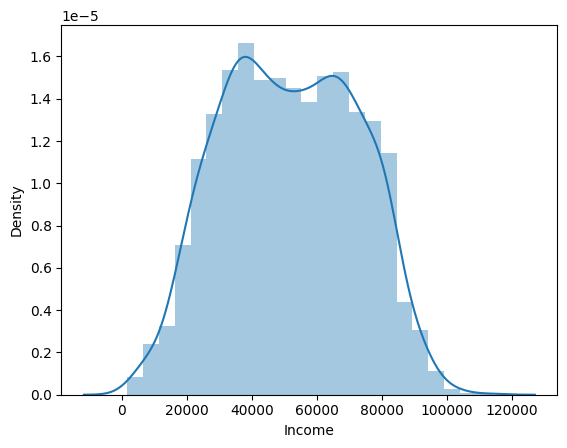

In [ ]:
sns.distplot(df["Income"])


<ipython-input-47-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

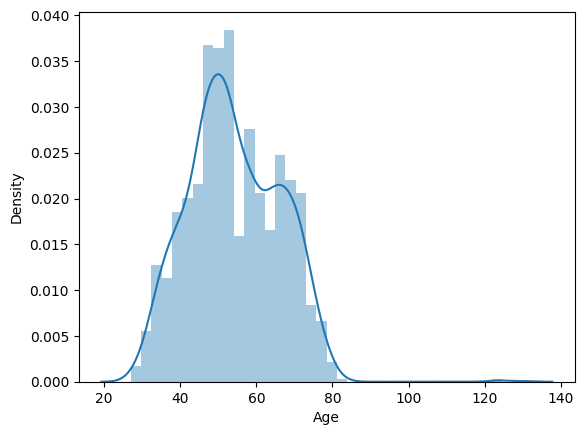

In [ ]:
sns.distplot(df["Age"])


In [ ]:
#using plotly,plotting marital status
import plotly.express as px
fig2 = px.histogram(df, x='Marital_Status', nbins=5, title="Distribution of Marital Status", color='Marital_Status')
fig2.show()

In [ ]:
# education level distribution
fig3 = px.histogram(df, x='Education_Leve', nbins=5, title='Distribution of education', color='Education_Leve')
fig3.show()

In [ ]:
# plotting the average spend by marital status
df_plot = df.groupby(['Marital_Status'])['Average_Spend'].mean().reset_index()

fig4 = px.bar(df_plot, x='Marital_Status', y='Average_Spend', color='Marital_Status')
fig4.show()

In [ ]:
# Average spend based on education level
df_plot = df.groupby(['Education_Leve'])['Average_Spend'].mean().reset_index()

fig5 = px.bar(df_plot, x='Education_Leve', y='Average_Spend', color='Education_Leve')

fig5.show()

**Total Campaigns Accepted Distribution**

In this we are plotting a histogram of Total_Campaigns_Accepted. This plot show us the distribution of the number of campaign accepted by each customer

In [ ]:
fig8 = px.histogram(df, x='Total_Campaign_Accepted', nbins=20, title='Total Campaign Accepted by Customer', color='Total_Campaign_Accepted')
fig8.show()

In [ ]:
# plotting the spending distribution based on education_level, is_parent, marital_status

fig10 = px.histogram(df, x='total_spending', color='Marital_Status', nbins=50, title="Spending Distribution Based on Marital Status")
fig10.show()

fig11 = px.histogram(df, x='total_spending', color='Education_Leve', nbins=50, title='Spending Distribution based on Education Level')
fig11.show()

fig12 = px.histogram(df, x='total_spending', color='Is_Parent', nbins=50, title='Spending Distribution based on is_parent')
fig12.show()

In [ ]:
# plotting the online purchase ration
fig13 = px.histogram(df, x='online_purchase_ratio',title='Distribution of the online purchase ratio')
fig13.show()

In [ ]:
# distribution of number of visits per months
fig14 = px.histogram(df, x='NumWebVisitsMonth', color='NumWebVisitsMonth')
fig14.show()

In [ ]:
# distribution for number of web purchase
fig15 = px.histogram(df, x='NumWebPurchases', color='NumWebPurchases')
fig15.show()

In [ ]:
# dist for number of catalogs purchases
fig16 = px.histogram(df, x='NumCatalogPurchases', color='NumCatalogPurchases')
fig16.show()

In [ ]:
# distibution of store purchases
fig17 = px.histogram(df, x='NumStorePurchases', color='NumStorePurchases')
fig17.show()

In [ ]:
# now we are going to see the difference between
# NumWebPurchases vs NumStorePurchases
fig18 = px.box(df, x='NumWebPurchases', y='NumStorePurchases')
fig18.show()


In [ ]:
# scatter plot of NumWebPurchases vs NumWebVisitsMonts for chekcing the
# correlation between purchases and visits/
fig19 = px.scatter(df, x='NumWebPurchases', y='NumWebVisitsMonth')
fig19.show()

In [ ]:
# clustering
# one hot encoding

# performing one hot encoding on the categorical variables
df = pd.get_dummies(df, columns=['Marital_Status', 'Education', 'Education_Leve', 'Living_Status'])



In [ ]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_Leve_High,Education_Leve_Low,Education_Leve_Medium,Living_Status_Living Alone,Living_Status_Living with Others
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,1,0,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,1,0,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,1,0,0,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,1,0,0,1,0,0,0,1
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,1,1,0,0,0,1
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,1,0,0,1,0,0,0,1
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
# performing datascaling using the StandardScaler
from sklearn.preprocessing import StandardScaler

df_cols = df.columns

In [ ]:
df_cols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Total_Campaign_Accepted', 'Average_Spend', 'Total_Spend', 'Is_Parent',
       'total_spending', 'avg_web_visits', 'online_purchase_ratio',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Education_Leve_High', 'Education_Leve_Low',
       'Education_Leve_Medium', 'Living_Status_Living Alone',


In [ ]:
# initializing the minmax scaler
scaler = StandardScaler()
df[df_cols] = scaler.fit_transform(df[df_cols])

In [ ]:
df.isnull().sum()

Income                              0
Kidhome                             0
Teenhome                            0
Recency                             0
MntWines                            0
MntFruits                           0
MntMeatProducts                     0
MntFishProducts                     0
MntSweetProducts                    0
MntGoldProds                        0
NumDealsPurchases                   0
NumWebPurchases                     0
NumCatalogPurchases                 0
NumStorePurchases                   0
NumWebVisitsMonth                   0
AcceptedCmp3                        0
AcceptedCmp4                        0
AcceptedCmp5                        0
AcceptedCmp1                        0
AcceptedCmp2                        0
Complain                            0
Response                            0
Age                                 0
Total_Campaign_Accepted             0
Average_Spend                       0
Total_Spend                         0
Is_Parent   

In [ ]:
df = df.dropna()

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA
# initializing the PCA model
pca = PCA(n_components=8)
# fit and transform the data
df_pca = pca.fit_transform(df)

# Customer Clustering with PCA, KMeans and Agglomerative for a Marketing Campaign

## Introduction

In [ ]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["Marital_Status", "Education","Education_Level","Living_Status"])

# Determining the optimal number of clusters using Silhouette Score

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

#best_k = list_k[np.argmax(silhouette_scores)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
best_k = list_k[np.argmax(silhouette_scores)]

best_k

4

# kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



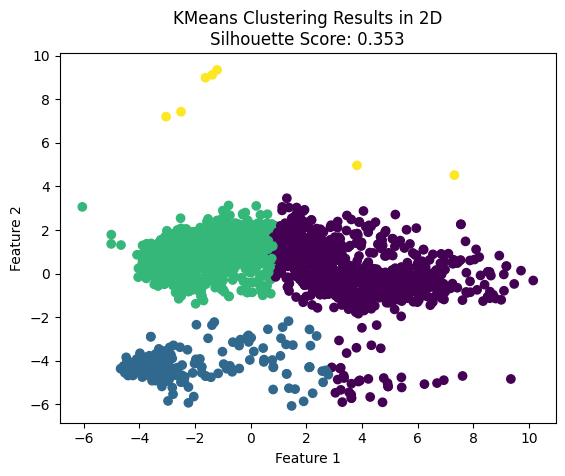

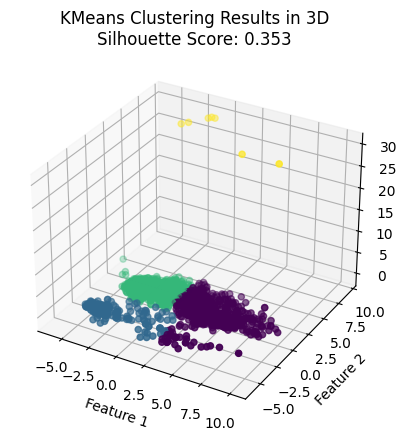

In [ ]:
from sklearn.metrics import silhouette_score
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Agglomerative Clustering

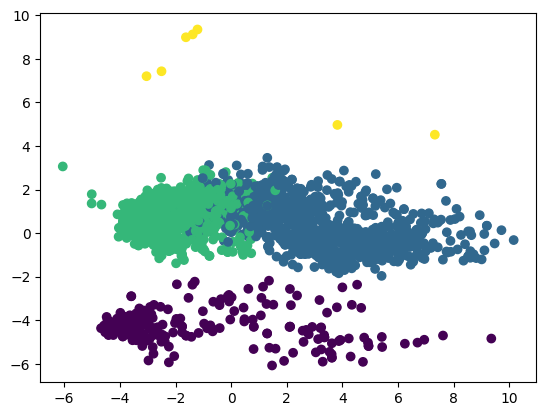

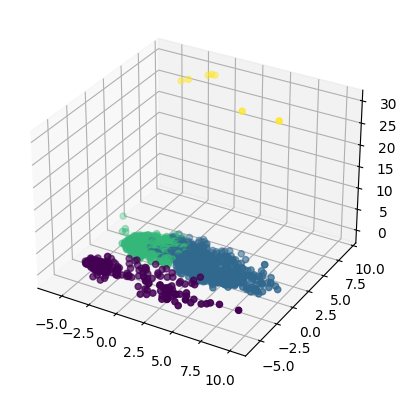

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Generate sample data
X = df_pca


# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()


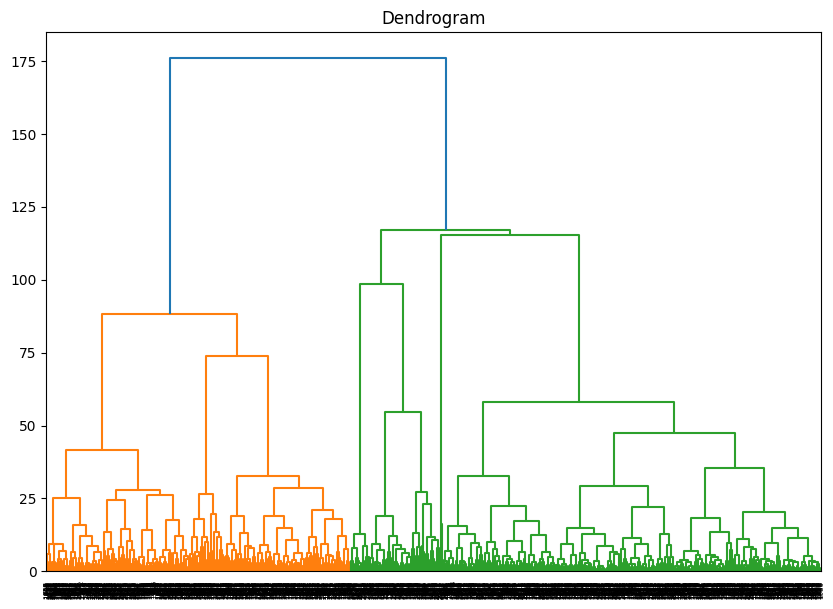

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (10, 7))
plt.title('Dendrogram')
link = linkage(X, method = 'ward', metric = 'euclidean')
dend = dendrogram(link)

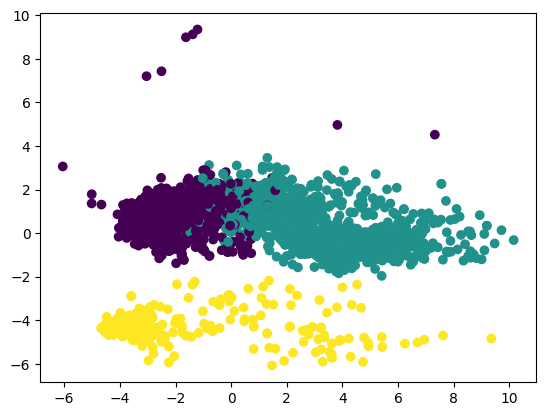

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca


# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

## Summary:


The code starts by loading a tab-separated file into a Pandas dataframe. It then performs various operations to understand the structure and content of the data, including getting the number of rows and columns, checking for missing data, and getting summary statistics. The code then performs data preprocessing, including one-hot encoding of categorical variables and scaling of numerical variables. The data is then reduced to 8 components using PCA, and two clustering algorithms (KMeans and Agglomerative Clustering) are applied to the data.

Finally, various evaluation metrics are used to assess the quality of the clustering results. The code visualizes the results of the clustering, as well as the relationships between different variables in the data, through various types of plots, including histograms, box plots, scatter plots, violin plots, and pair plots.